# API data overview

Overview of some data from Dimensions and Altmetrics. You will need to download your own copy of the data to replicate this part.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

### Dimensions

In [9]:
# load Dimensions data

directory_name = "datasets_output/json_dimensions_cwts"

all_dimensions = list()
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [3]:
#all_dimensions[0]

In [11]:
df_dimensions = pd.DataFrame.from_dict({
    "id":[r["id"] for r in all_dimensions],
    "publication_type":[r["publication_type"] for r in all_dimensions],
    "doi":[r["doi"] for r in all_dimensions],
    "concepts":[r["concepts"] for r in all_dimensions],
    "title":[r["title"] for r in all_dimensions],
    "year":[r["year"] for r in all_dimensions],
    "journal":[r["journal"]["title"] for r in all_dimensions],
    "times_cited":[r["times_cited"] for r in all_dimensions],
    "relative_citation_ratio":[r["relative_citation_ratio"] for r in all_dimensions],
    "for_top":[r["for"][0]["first_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "for_bottom":[r["for"][0]["second_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
})

In [5]:
df_dimensions.shape

(130246, 10)

In [6]:
del all_dimensions

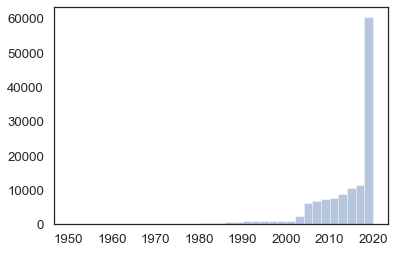

In [7]:
# distribution of time of publication

sns.distplot(df_dimensions.year.tolist(), bins=35, kde=False)

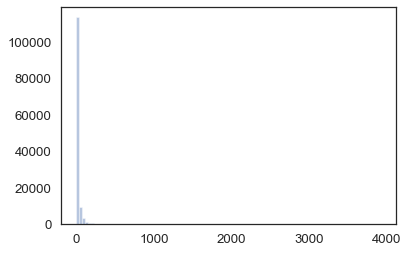

In [8]:
# distribution of times_cited and relative_citation_ratio citations

sns.distplot(df_dimensions.times_cited.tolist(), bins=100, kde=False)

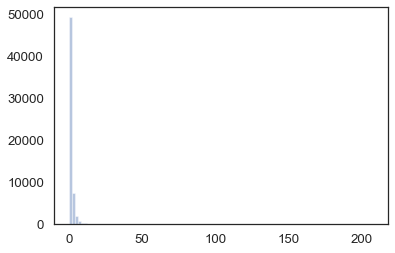

In [9]:
sns.distplot(df_dimensions.relative_citation_ratio.tolist(), bins=100, kde=False)

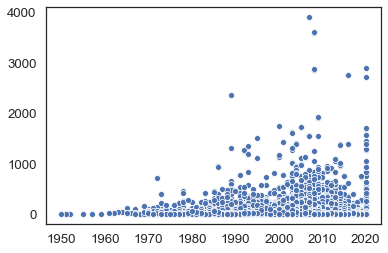

In [10]:
# scatter of citations vs time of publication

sns.scatterplot(df_dimensions.year.to_list(),df_dimensions.times_cited.to_list())

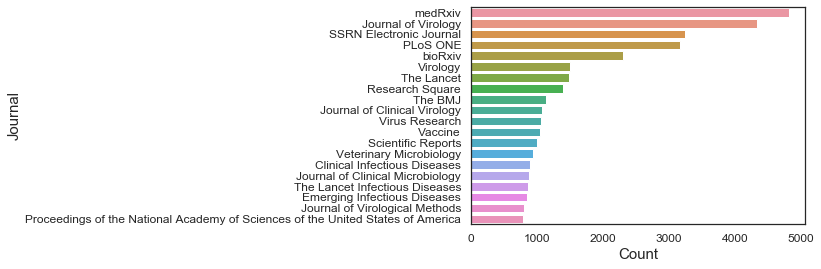

In [11]:
# distribution of journals

df_sub = df_dimensions[df_dimensions.journal.isin(df_dimensions.journal.value_counts()[:20].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=12)

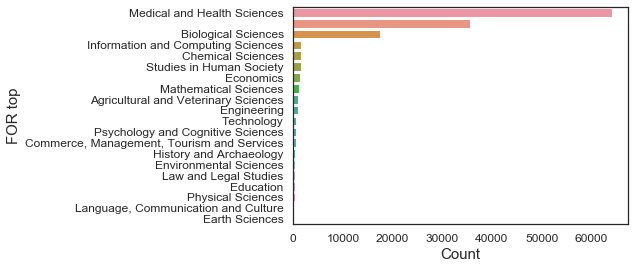

In [12]:
# FOR jeywords distribution

df_sub = df_dimensions[df_dimensions.for_top.isin(df_dimensions.for_top.value_counts()[:20].index.tolist())]
b = sns.countplot(y="for_top", data=df_sub, order=df_sub['for_top'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("FOR top",fontsize=15)
b.tick_params(labelsize=12)

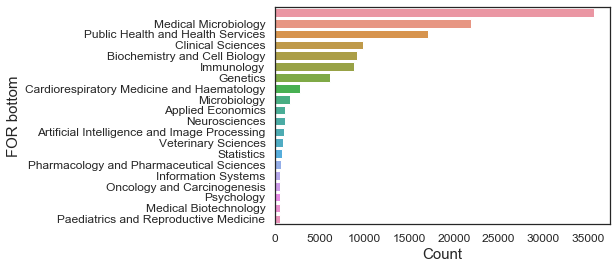

In [13]:
df_sub = df_dimensions[df_dimensions.for_bottom.isin(df_dimensions.for_bottom.value_counts()[:20].index.tolist())]
b = sns.countplot(y="for_bottom", data=df_sub, order=df_sub['for_bottom'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("FOR bottom",fontsize=15)
b.tick_params(labelsize=12)

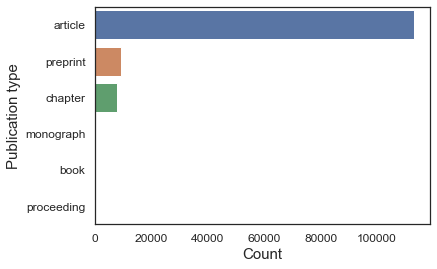

In [14]:
# publication type
df_sub = df_dimensions[df_dimensions.publication_type.isin(df_dimensions.publication_type.value_counts()[:10].index.tolist())]
b = sns.countplot(y="publication_type", data=df_sub, order=df_sub['publication_type'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Publication type",fontsize=15)
b.tick_params(labelsize=12)

### Altmetrics

In [7]:
# load Altmetrics data

# separately export twitter IDs if necessary (to hydrate them)

out_folder = "datasets_output/json_altmetrics_cwts"
all_altmetrics = list()

for root, dirs, files in os.walk(out_folder):
    for file in files:
        if ".json" in file:
            all_altmetrics.append(json.loads(codecs.open(os.path.join(root,file)).read()))

In [8]:
all_altmetrics[1004]

{'altmetric_id': 78436442,
 'counts': {'readers': {'mendeley': 0, 'citeulike': 0, 'connotea': 0},
  'total': {'posts_count': 0}},
 'citation': {'aggregated_in': [78436316],
  'attribution': 'springer_nature',
  'authors': ['Karin Stockert'],
  'book': {'title': 'Allergieprävention',
   'isbns': ['9783662581391', '9783662581407'],
   'attribution': 'springer_nature'},
  'doi': '10.1007/978-3-662-58140-7_7',
  'first_seen_on': '2020-03-27T07:10:08+00:00',
  'issns': [],
  'links': ['https://doi.org/10.1007/978-3-662-58140-7_7'],
  'ordinal_number': 7,
  'pdf_url': 'https://link.springer.com/content/pdf/10.1007%2F978-3-662-58140-7_7.pdf',
  'pubdate': '2020-01-01T00:00:00+00:00',
  'publisher': 'Springer, Berlin, Heidelberg',
  'title': 'Synopsis',
  'type': 'chapter'},
 'altmetric_score': {'score': 0,
  'score_history': {'1y': 0,
   '6m': 0,
   '3m': 0,
   '1m': 0,
   '1w': 0,
   '6d': 0,
   '5d': 0,
   '4d': 0,
   '3d': 0,
   '2d': 0,
   '1d': 0,
   'at': 0},
  'context_for_score': None

In [3]:
print(dict)

<class 'dict'>


In [4]:
# NB there is a lot we are leaving there for now

df_altmetrics = pd.DataFrame.from_dict({
    "first_seen_on":[r["citation"]["first_seen_on"] if "first_seen_on" in r["citation"] else "" for r in all_altmetrics],
    "altmetric_id":[r["altmetric_id"] if "altmetric_id" in r.keys() else "" for r in all_altmetrics],
    "counts_mendelzey":[r["counts"]["readers"]["mendeley"] if "readers" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_news":[r["counts"]["news"]["posts_count"] if "news" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_twitter_count":[r["counts"]["twitter"]["posts_count"] if "twitter" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_twitter_unique":[r["counts"]["twitter"]["unique_users_count"] if "twitter" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_total":[r["counts"]["total"]["posts_count"] if "total" in r["counts"].keys() else 0 for r in all_altmetrics],
    "doi":[r["citation"]["doi"] if "doi" in r["citation"] else "" for r in all_altmetrics],
    "altmetric_score":[r["altmetric_score"]["score"] for r in all_altmetrics],
    "member_of_the_public":[r["demographics"]["poster_types"]["member_of_the_public"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "member_of_the_public" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics],
    "researcher":[r["demographics"]["poster_types"]["researcher"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "researcher" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics],
    "science_communicator":[r["demographics"]["poster_types"]["science_communicator"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "science_communicator" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics]
})

NameError: name 'pd' is not defined

In [19]:
df_altmetrics.shape

(20118, 11)

In [42]:
print(df_altmetrics["first_seen_on"][:3])

df = pd.DataFrame()
df['year'] = pd.DatetimeIndex(df_altmetrics["first_seen_on"]).year
df.head()

#print(df_altmetrics[:50][["counts_twitter_count", "doi", "first_seen_on"]])



0                             
1    2017-01-25T23:20:41+00:00
2    2020-03-28T19:02:16+00:00
Name: first_seen_on, dtype: object


,year
0,NaN
1,2017.0
2,2020.0
3,2016.0
4,2020.0


In [49]:
df_tweets_stuff = pd.DataFrame()
df_tweets_stuff['doi'] = df_altmetrics["doi"]
df_tweets_stuff['year'] = pd.DatetimeIndex(df_altmetrics["first_seen_on"]).year
df_tweets_stuff['counts_twitter_count'] = df_altmetrics['counts_twitter_count']
df_tweets_stuff.head()

df_tweets_stuff = df_tweets_stuff[df.year >= 2020.0]

df_tweets_stuff.head()
df_tweets_stuff.shape

(7297, 3)

In [21]:
del all_altmetrics

In [50]:
list1 = []
percentage = len(df_tweets_stuff)/10
url1 = 'https://api.altmetric.com/v1/fetch/doi/'
url2 = '?key=bfc9115e2490100d074ded6a3a2cb845'

i = 0
# using length and cutoff variables we can find the 10% most popular papers by twitter count
length = df_tweets_stuff.shape[0]
cutoff = int(length * 0.9)
collection_of_twitter_counts = df_tweets_stuff.sort_values('counts_twitter_count')[cutoff:length]["counts_twitter_count"]
collection_of_dois = df_tweets_stuff.sort_values('counts_twitter_count')[cutoff:length]["doi"]
    
#print(df_altmetrics.sort_values('counts_twitter_count')[-1:]["doi"])
#10.1056/nejmc2010025

list_of_dois = []
list_of_twitter_counts = []
for entry in collection_of_dois:
    list_of_dois.append(url1 + entry + url2)

for entry in collection_of_twitter_counts:
    list_of_twitter_counts.append(entry)
print(list_of_twitter_counts)
#for i in range(len(list_of_dois)):
    #print(list_of_twitter_counts[i], list_of_dois[i])
#print(list_of_dois)
# Due to the dot I don't get to the correct URL and I get the message 
# "You must have a commercial license key to use this call."
# I just want to list all urls in a row.

#https://api.altmetric.com/v1/fetch/doi/10.1016...


[187, 187, 187, 187, 188, 188, 188, 188, 188, 189, 189, 189, 189, 190, 190, 191, 191, 192, 192, 192, 192, 192, 193, 194, 194, 194, 195, 195, 195, 196, 196, 197, 197, 197, 197, 197, 198, 198, 198, 198, 198, 198, 199, 199, 199, 200, 200, 200, 201, 202, 202, 203, 203, 204, 204, 204, 205, 205, 205, 207, 207, 207, 208, 208, 209, 209, 209, 209, 209, 210, 210, 211, 211, 212, 213, 213, 213, 213, 214, 214, 214, 215, 215, 216, 216, 216, 219, 220, 221, 221, 222, 222, 223, 223, 224, 224, 225, 225, 225, 226, 226, 227, 228, 229, 229, 230, 230, 231, 232, 233, 237, 238, 238, 238, 238, 238, 239, 239, 240, 240, 240, 240, 240, 241, 241, 242, 242, 242, 243, 243, 243, 244, 245, 245, 248, 250, 251, 252, 253, 254, 257, 257, 257, 258, 259, 259, 262, 262, 262, 263, 263, 265, 265, 266, 268, 269, 270, 270, 270, 270, 271, 271, 271, 272, 274, 275, 277, 278, 278, 279, 279, 279, 279, 280, 280, 282, 283, 283, 284, 286, 286, 286, 286, 287, 287, 287, 288, 289, 290, 290, 292, 294, 295, 295, 297, 298, 298, 299, 299, 299,

[187, 187, 187, 187, 188, 188, 188, 188, 188, 189, 189, 189, 189, 190, 190, 191, 191, 192, 192, 192, 192, 192, 193, 194, 194, 194, 195, 195, 195, 196, 196, 197, 197, 197, 197, 197, 198, 198, 198, 198, 198, 198, 199, 199, 199, 200, 200, 200, 201, 202, 202, 203, 203, 204, 204, 204, 205, 205, 205, 207, 207, 207, 208, 208, 209, 209, 209, 209, 209, 210, 210, 211, 211, 212, 213, 213, 213, 213, 214, 214, 214, 215, 215, 216, 216, 216, 219, 220, 221, 221, 222, 222, 223, 223, 224, 224, 225, 225, 225, 226, 226, 227, 228, 229, 229, 230, 230, 231, 232, 233, 237, 238, 238, 238, 238, 238, 239, 239, 240, 240, 240, 240, 240, 241, 241, 242, 242, 242, 243, 243, 243, 244, 245, 245, 248, 250, 251, 252, 253, 254, 257, 257, 257, 258, 259, 259, 262, 262, 262, 263, 263, 265, 265, 266, 268, 269, 270, 270, 270, 270, 271, 271, 271, 272, 274, 275, 277, 278, 278, 279, 279, 279, 279, 280, 280, 282, 283, 283, 284, 286, 286, 286, 286, 287, 287, 287, 288, 289, 290, 290, 292, 294, 295, 295, 297, 298, 298, 299, 299, 299,

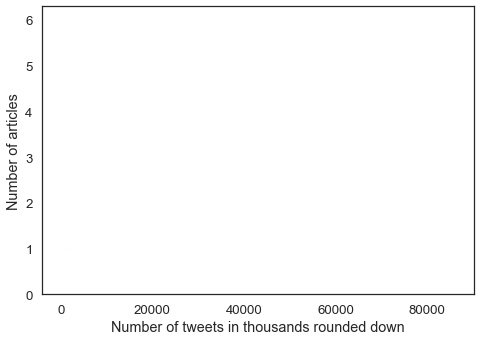

In [51]:
# This program assumes that twitter_counts are stored in a list called "list". 
print(list_of_twitter_counts)
twitter_count_dict = {}
for value in list_of_twitter_counts:
    if str(value) in twitter_count_dict:
        twitter_count_dict[str(value)] += 1
    else:
        twitter_count_dict[str(value)] = 1
        
import matplotlib.pylab as plt

lists = sorted(twitter_count_dict.items()) # sorted by key, return a list of tuples
x_values = []
y_values = []
for key in twitter_count_dict:
    x_values.append(int(key))
    y_values.append(twitter_count_dict[key])
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_values,y_values)
ax.set_ylabel("Number of articles")
ax.set_xlabel("Number of tweets in thousands rounded down")
plt.show()

In [24]:
# scores

sns.distplot(df_altmetrics.counts_mendeley.tolist(), bins=100, kde=False)

AttributeError: 'DataFrame' object has no attribute 'counts_mendeley'

In [ ]:
sns.distplot(df_altmetrics.counts_news.tolist(), bins=100, kde=False)

In [ ]:
sns.distplot(df_altmetrics.counts_twitter_count.tolist(), bins=100, kde=False)

In [ ]:
sns.distplot(df_altmetrics.counts_total.tolist(), bins=100, kde=False)

In [ ]:
# demographics

sns.distplot(df_altmetrics.researcher.tolist(), bins=100, kde=False)

In [ ]:
# comparison

sns.pairplot(df_altmetrics[df_altmetrics.counts_total < 10000][["counts_news","counts_twitter_count","counts_twitter_unique","counts_total","altmetric_score","member_of_the_public","researcher","science_communicator"]])